<a href="https://colab.research.google.com/github/SteenJennings/Neural-Net-Options/blob/master/Kevin/ROTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AlphaVantage CSV Processing

In [66]:
pip install alpha_vantage

Using several API keys to pull the technical data

In [67]:
from alpha_vantage.timeseries import  TimeSeries
from alpha_vantage.techindicators import TechIndicators
import pandas as pd
import time

tickers = ['AMD', 'SPY', 'TSLA', 'AAPL', 'AMZN', 'OPEN', 'SNAP', 'GOOG', 'NVDA', 'FSLY', 'ROKU', 'CHWY']
ticker = tickers[1]

#update the ti for API call limit
API_key = '04ZKSL2N50GIBN85'    #steens key
ti = TechIndicators(key = API_key, output_format='pandas')

# RSI/EMA data
data_rsi15 = ti.get_rsi(ticker, interval='daily',time_period=15, series_type='close')
data_ema5 = ti.get_ema(ticker,interval='daily',time_period=5, series_type='close')
data_ema10 = ti.get_ema(ticker,interval='daily',time_period=10, series_type='close')
data_ema20 = ti.get_ema(ticker,interval='daily',time_period=20, series_type='close')
data_ema125 = ti.get_ema(ticker,interval='daily',time_period=125, series_type='close')

#update the ti for API call limit
API_key = 'D6XW69E9UXBCXJBK'     #steen@yopmail.com
ti = TechIndicators(key = API_key, output_format='pandas')

# ADX data
data_adx5 = ti.get_adx(ticker,interval='daily',time_period=5)
data_adx10 = ti.get_adx(ticker,interval='daily',time_period=10)
data_adx20 = ti.get_adx(ticker,interval='daily',time_period=15)

#update the ti for API call limit
API_key = '50F3VWQLVV9C4HGT'    #kevins key
ti = TechIndicators(key = API_key, output_format='pandas')

# Bolinger Bands data
data_bb5 = ti.get_bbands(ticker,interval='daily',time_period=5, series_type='close')
data_bb10 = ti.get_bbands(ticker,interval='daily',time_period=10, series_type='close')
data_bb20 = ti.get_bbands(ticker,interval='daily',time_period=20, series_type='close')

# grabs the stock price data
API_key = "PK3E26W0JBG0A8LI"  # steen other email key
ts = TimeSeries(key = API_key, output_format='pandas')

# make sure that the call limit has not been met
data = ts.get_daily_adjusted(ticker, outputsize='full')
# inverts the DF to fit technical format
data = data[0].iloc[::-1]
# trims to match size of other df
data = data.iloc[149:]
# this commented section is used to trim the data after market close when the technical data is not updated but time series data is updated (1-4pm or so)
# data = data[:-1]
# data
pct_price = data[['5. adjusted close']]
pct_price = pct_price.pct_change()

Trimming the data and adding to a single dataframe

In [68]:
# this code trims the data for each indicator type to fit into one dataframe, with ema5 heading the list
ema5_df = data_ema5[0]
ema5_df = ema5_df.iloc[145:]
ema10_df = data_ema10[0]
ema10_df = ema10_df.iloc[140:]
ema20_df = data_ema20[0]
ema20_df = ema20_df.iloc[130:]
ema125_df = data_ema125[0]
ema125_df = ema125_df.iloc[25:]
rsi15_df = data_rsi15[0]
rsi15_df = rsi15_df.iloc[134:]
adx5_df = data_adx5[0]
adx5_df = adx5_df.iloc[140:]
adx10_df = data_adx10[0]
adx10_df = adx10_df.iloc[130:]
adx20_df = data_adx20[0]
adx20_df = adx20_df.iloc[120:]
# converting the data type of the bb DF's and flipping the orientation
bb5_df = data_bb5[0].iloc[::-1]
bb10_df = data_bb10[0].iloc[::-1]
bb20_df = data_bb20[0].iloc[::-1]
# resizing the data
bb5_df = bb5_df.iloc[145:]
bb10_df = bb10_df.iloc[140:]
bb20_df = bb20_df.iloc[130:]
print(bb20_df)

#this is used to dynamically merge all dataframes using it as an element of the below loop
df_list = []

# storing everything in a tuple so we can access the column name and the DF itself
ema5_df = (ema5_df,"EMA_5")
ema10_df = (ema10_df,"EMA_10")
ema20_df = (ema20_df,"EMA_20")
ema125_df = (ema125_df,"EMA_125")
adx5_df = (adx5_df,"ADX_5")
adx10_df = (adx10_df,"ADX_10")
adx20_df = (adx20_df,"ADX_20")
bb5_df = (bb5_df,"BB_5")
bb10_df = (bb10_df,"BB_10")
bb20_df = (bb20_df,"BB_20")
rsi15_df = (rsi15_df,"RSI_15")

#appending the items to our list
df_list.append(ema5_df)
df_list.append(ema10_df)
df_list.append(ema20_df)
df_list.append(ema125_df)
df_list.append(adx5_df)
df_list.append(adx10_df)
df_list.append(adx20_df)
df_list.append(bb5_df)
df_list.append(bb10_df)
df_list.append(bb20_df)
df_list.append(rsi15_df)

#iterating across our list to fill our DF with our trimmed values
for dataframe_tuple in df_list:
  cur_dataframe, indicator_type = dataframe_tuple
  if indicator_type[0:3] == "EMA":
    temp = "EMA"
  elif indicator_type[0:3] == "RSI":
    temp = "RSI"
  elif indicator_type[0:3] == "ADX":  
    temp = "ADX"
  # this indicator has three elements. Might connect these.
  elif indicator_type[0:2] == "BB":  
    temp_list = list(cur_dataframe["Real Upper Band"])
    data[indicator_type + ' ' + 'Upper Band'] = temp_list
    continue
  else:
    temp = indicator_type
  temp_list = list(cur_dataframe[temp])
  data[indicator_type] = temp_list

data

            Real Upper Band  Real Lower Band  Real Middle Band
date                                                          
2000-06-05         100.0806          91.8174           95.9490
2000-06-06         100.3882          91.7804           96.0843
2000-06-07         100.8092          91.7754           96.2923
2000-06-08         101.0012          92.1751           96.5882
2000-06-09         101.2333          92.3011           96.7672
...                     ...              ...               ...
2021-05-20         423.1499         408.3911          415.7705
2021-05-21         423.0543         408.3067          415.6805
2021-05-24         423.2445         408.2725          415.7585
2021-05-25         423.3208         408.2682          415.7945
2021-05-26         423.5100         408.2460          415.8780

[5278 rows x 3 columns]


,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient,EMA_5,EMA_10,EMA_20,EMA_125,ADX_5,ADX_10,ADX_20,BB_5 Upper Band,BB_10 Upper Band,BB_20 Upper Band,RSI_15
date,,,,,,,,,,,,,,,,,,,
2000-06-05,147.468704,148.218704,146.875000,147.125000,99.154989,6998100.0,0.0,1.0,97.8779,96.8596,96.4841,95.9300,42.6253,21.9834,19.6178,100.7353,100.5137,100.0806,57.0978
2000-06-06,146.625000,147.781204,145.906204,146.468704,98.712678,4858900.0,0.0,1.0,98.1561,97.1965,96.6963,95.9742,40.5653,21.3969,18.6879,100.7094,101.1739,100.3882,55.7546
2000-06-07,146.625000,148.000000,146.000000,147.484299,99.397139,4919500.0,0.0,1.0,98.5698,97.5966,96.9535,96.0285,39.3829,20.9943,17.8791,100.1693,101.6932,100.8092,57.4155
2000-06-08,147.500000,147.750000,146.062500,146.906204,99.007531,5723100.0,0.0,1.0,98.7157,97.8531,97.1492,96.0758,38.4371,20.6320,17.1243,99.8191,102.0632,101.0012,56.1304
2000-06-09,147.500000,147.968704,145.625000,146.593704,98.796922,3085300.0,0.0,1.0,98.7428,98.0247,97.3061,96.1190,35.0665,19.8884,16.2697,99.5075,101.7720,101.2333,55.4121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,411.800000,416.625000,411.670000,415.280000,415.280000,78022218.0,0.0,1.0,413.5146,413.9309,413.7458,388.4847,28.8602,24.8373,20.0985,418.4814,422.8193,423.1499,53.5131
2021-05-21,416.870000,418.200000,414.450000,414.940000,414.940000,76578662.0,0.0,1.0,413.9898,414.1143,413.8595,388.9047,23.6180,22.8697,18.9850,417.5560,420.3339,423.0543,53.0958
2021-05-24,417.340000,420.320000,417.080000,419.170000,419.170000,51376702.0,0.0,1.0,415.7165,415.0335,414.3653,389.3851,22.1104,20.8486,17.8595,420.2617,420.8113,423.2445,57.5125


Removing Columns and Making the Columns relationally based on price

In [69]:
# modifying the data to percentages as a product of price
data['EMA_5'] = ((data['EMA_5'] - data['5. adjusted close']) / data['5. adjusted close'])
data['EMA_10'] = ((data['EMA_10'] - data['5. adjusted close']) / data['5. adjusted close'])
data['EMA_20'] = ((data['EMA_20'] - data['5. adjusted close']) / data['5. adjusted close'])
data['EMA_125'] = ((data['EMA_125'] - data['5. adjusted close']) / data['5. adjusted close'])
data['BB_5 Upper Band'] = ((data['BB_5 Upper Band'] - data['5. adjusted close']) / data['5. adjusted close'])
data['BB_10 Upper Band'] = ((data['BB_10 Upper Band'] - data['5. adjusted close']) / data['5. adjusted close'])
data['BB_20 Upper Band'] = ((data['BB_20 Upper Band'] - data['5. adjusted close']) / data['5. adjusted close'])

# dropping unneeded columns
data = data.drop(columns=['1. open', '2. high', '3. low', '4. close', '7. dividend amount', '6. volume', '8. split coefficient'])

# generating our price prediction list
prediction_list = [0 for _ in range(len(data))]
close_list = data['5. adjusted close'].tolist()
for i in range(1, len(close_list)-3):
    three_percent = close_list[i] * 1.03
    if ((close_list[i+1] >= three_percent) or 
    (close_list[i+2] >= three_percent) or (close_list[i+3] >= three_percent)):
      prediction_list[i] = 1
data = data.assign(Prediction = prediction_list)
prediction_list


# adding the percentage change column LAST, as all dependencies have been updated already
data['5. adjusted close'] = pct_price['5. adjusted close']
data

,5. adjusted close,EMA_5,EMA_10,EMA_20,EMA_125,ADX_5,ADX_10,ADX_20,BB_5 Upper Band,BB_10 Upper Band,BB_20 Upper Band,RSI_15,Prediction
date,,,,,,,,,,,,,
2000-06-05,NaN,-0.012880,-0.023150,-0.026937,-0.032525,42.6253,21.9834,19.6178,0.015938,0.013703,0.009335,57.0978,0
2000-06-06,-0.004461,-0.005638,-0.015360,-0.020427,-0.027742,40.5653,21.3969,18.6879,0.020228,0.024933,0.016974,55.7546,0
2000-06-07,0.006934,-0.008324,-0.018115,-0.024585,-0.033891,39.3829,20.9943,17.8791,0.007768,0.023100,0.014206,57.4155,0
2000-06-08,-0.003920,-0.002948,-0.011660,-0.018770,-0.029611,38.4371,20.6320,17.1243,0.008197,0.030863,0.020137,56.1304,0
2000-06-09,-0.002127,-0.000548,-0.007816,-0.015090,-0.027105,35.0665,19.8884,16.2697,0.007192,0.030113,0.024660,55.4121,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,0.010758,-0.004251,-0.003249,-0.003694,-0.064523,28.8602,24.8373,20.0985,0.007709,0.018155,0.018951,53.5131,0
2021-05-21,-0.000819,-0.002290,-0.001990,-0.002604,-0.062745,23.6180,22.8697,18.9850,0.006305,0.012999,0.019555,53.0958,0
2021-05-24,0.010194,-0.008239,-0.009868,-0.011462,-0.071057,22.1104,20.8486,17.8595,0.002604,0.003916,0.009720,57.5125,0


Applying a MinMax scaler to normalize all of the data

In [70]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

print(data)

data[["5. adjusted close",	"EMA_5",	"EMA_10",	"EMA_20",	"EMA_125", "ADX_5",	"ADX_10",	"ADX_20",	"BB_5 Upper Band",	"BB_10 Upper Band",	"BB_20 Upper Band",	"RSI_15"]] = min_max_scaler.fit_transform(data[["5. adjusted close",	"EMA_5",	"EMA_10",	"EMA_20",	"EMA_125", "ADX_5",	"ADX_10",	"ADX_20",	"BB_5 Upper Band",	"BB_10 Upper Band",	"BB_20 Upper Band",	"RSI_15"]])
data

            5. adjusted close     EMA_5  ...   RSI_15  Prediction
date                                     ...                     
2000-06-05                NaN -0.012880  ...  57.0978           0
2000-06-06          -0.004461 -0.005638  ...  55.7546           0
2000-06-07           0.006934 -0.008324  ...  57.4155           0
2000-06-08          -0.003920 -0.002948  ...  56.1304           0
2000-06-09          -0.002127 -0.000548  ...  55.4121           0
...                       ...       ...  ...      ...         ...
2021-05-20           0.010758 -0.004251  ...  53.5131           0
2021-05-21          -0.000819 -0.002290  ...  53.0958           0
2021-05-24           0.010194 -0.008239  ...  57.5125           0
2021-05-25          -0.002219 -0.004022  ...  56.2645           0
2021-05-26           0.001985 -0.003997  ...  57.1535           0

[5278 rows x 13 columns]


,5. adjusted close,EMA_5,EMA_10,EMA_20,EMA_125,ADX_5,ADX_10,ADX_20,BB_5 Upper Band,BB_10 Upper Band,BB_20 Upper Band,RSI_15,Prediction
date,,,,,,,,,,,,,
2000-06-05,NaN,0.256031,0.179577,0.148062,0.142996,0.364580,0.197473,0.250582,0.062184,0.053951,0.050866,0.569735,0
2000-06-06,0.412231,0.302994,0.213914,0.169058,0.150795,0.339213,0.187791,0.230627,0.078944,0.081495,0.065531,0.550218,0
2000-06-07,0.456983,0.285579,0.201770,0.155648,0.140768,0.324652,0.181146,0.213271,0.030268,0.076999,0.060218,0.574351,0
2000-06-08,0.414356,0.320445,0.230220,0.174403,0.147747,0.313005,0.175166,0.197073,0.031942,0.096039,0.071604,0.555679,0
2000-06-09,0.421396,0.336009,0.247162,0.186271,0.151834,0.271499,0.162891,0.178734,0.028017,0.094199,0.080289,0.545242,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,0.472001,0.311991,0.267295,0.223024,0.090812,0.195074,0.244580,0.260898,0.030036,0.064870,0.069327,0.517650,0
2021-05-21,0.426535,0.324710,0.272844,0.226541,0.093713,0.130520,0.212102,0.237003,0.024548,0.052225,0.070488,0.511586,0
2021-05-24,0.469788,0.286128,0.238117,0.197970,0.080157,0.111956,0.178741,0.212850,0.010093,0.029947,0.051606,0.575761,0


Saving as a CSV based on the name of the ticker passed.

In [71]:
filename = "%s.csv" % ticker
data.to_csv(filename, index=False)

In [72]:
# dropping unneeded columns
dates = data.index
data.reset_index(inplace=True)
data

,date,5. adjusted close,EMA_5,EMA_10,EMA_20,EMA_125,ADX_5,ADX_10,ADX_20,BB_5 Upper Band,BB_10 Upper Band,BB_20 Upper Band,RSI_15,Prediction
0,2000-06-05,NaN,0.256031,0.179577,0.148062,0.142996,0.364580,0.197473,0.250582,0.062184,0.053951,0.050866,0.569735,0
1,2000-06-06,0.412231,0.302994,0.213914,0.169058,0.150795,0.339213,0.187791,0.230627,0.078944,0.081495,0.065531,0.550218,0
2,2000-06-07,0.456983,0.285579,0.201770,0.155648,0.140768,0.324652,0.181146,0.213271,0.030268,0.076999,0.060218,0.574351,0
3,2000-06-08,0.414356,0.320445,0.230220,0.174403,0.147747,0.313005,0.175166,0.197073,0.031942,0.096039,0.071604,0.555679,0
4,2000-06-09,0.421396,0.336009,0.247162,0.186271,0.151834,0.271499,0.162891,0.178734,0.028017,0.094199,0.080289,0.545242,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5273,2021-05-20,0.472001,0.311991,0.267295,0.223024,0.090812,0.195074,0.244580,0.260898,0.030036,0.064870,0.069327,0.517650,0
5274,2021-05-21,0.426535,0.324710,0.272844,0.226541,0.093713,0.130520,0.212102,0.237003,0.024548,0.052225,0.070488,0.511586,0
5275,2021-05-24,0.469788,0.286128,0.238117,0.197970,0.080157,0.111956,0.178741,0.212850,0.010093,0.029947,0.051606,0.575761,0
5276,2021-05-25,0.421037,0.313475,0.253966,0.207905,0.085312,0.103460,0.151122,0.191762,0.030750,0.040997,0.056266,0.557627,0


# Keras NN w/Predictions

[Tutorial](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

In [73]:
#predict
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

#load the dataset
dataset = loadtxt(filename, delimiter=',', skiprows=2)
#split into input(x) and output(y) variables
X=dataset[:,0:12]
y=dataset[:,12]

#define the keras model
model = Sequential()
model.add(Dense(12, input_dim=12, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit the keras model on the dataset
model.fit(X, y, epochs=300, batch_size=10)

# make class predictions with the model
predictions = model.predict_classes(X)
print(predictions)

#summarize teh first X cases
for i in range(len(X)):
  print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))


Epoch 1/300
528/528 [==============================] - 2s 2ms/step - loss: 0.4050 - accuracy: 0.9409
Epoch 2/300
528/528 [==============================] - 1s 2ms/step - loss: 0.1778 - accuracy: 0.9438
Epoch 3/300
528/528 [==============================] - 1s 2ms/step - loss: 0.1765 - accuracy: 0.9382
Epoch 4/300
528/528 [==============================] - 1s 2ms/step - loss: 0.1553 - accuracy: 0.9501
Epoch 5/300
528/528 [==============================] - 1s 2ms/step - loss: 0.1648 - accuracy: 0.9447
Epoch 6/300
528/528 [==============================] - 1s 2ms/step - loss: 0.1513 - accuracy: 0.9466
Epoch 7/300
528/528 [==============================] - 1s 2ms/step - loss: 0.1512 - accuracy: 0.9498
Epoch 8/300
528/528 [==============================] - 1s 2ms/step - loss: 0.1691 - accuracy: 0.9402
Epoch 9/300
528/528 [==============================] - 1s 2ms/step - loss: 0.1617 - accuracy: 0.9446
Epoch 10/300
528/528 [==============================] - 1s 2ms/step - loss: 0.1683 - accura

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Streaming output truncated to the last 5000 lines.
[0.5229759461759436, 0.2784051981813856, 0.26316490172043405, 0.25133969006024415, 0.25418594839771225, 0.38316676353820844, 0.32032233943689636, 0.2992753203333054, 0.008473483541487303, 0.10342615321053486, 0.09082501813029684, 0.4076040997683928] => 0 (expected 0)
[0.4637778210084322, 0.2620036296959101, 0.23567469187631218, 0.22458794466777524, 0.2389872067617178, 0.30023323055098566, 0.28423577261270244, 0.28464867950360406, 0.0265608202119365, 0.08200949994173243, 0.07449383866390591, 0.4568460727020171] => 0 (expected 0)
[0.3805939368029988, 0.3420050793422361, 0.2892612635184759, 0.2624390044506233, 0.2591836899104565, 0.2159451378695485, 0.2571617689053367, 0.27405852802259234, 0.08420553201957486, 0.10773998887290769, 0.09878522428538376, 0.3929506534114851] => 0 (expected 0)
[0.4665160281493265, 0.30107706665599177, 0.2543683314518629, 0.23252722965085182, 0.24271898792574004, 0.1590622506378745, 0.24044891147715253, 0.26847

In [74]:
#export the predictions to CSV
import pandas as pd
from datetime import date

test_DF = pd.DataFrame(predictions, columns=['Prediction'])
test_DF['date']= data['date']
test_DF = test_DF.set_index('date')

today = date.today()
saveLocation = "/content/%s_pred_%s.csv" %(ticker,today)
test_DF.to_csv(saveLocation)
#test_DF

# Keras NN - No Predictions

In [ ]:
_from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

#load the dataset
dataset = loadtxt('/content/amd_1.csv', delimiter=',')
#split into input(x) and output(y) variables - total columns from the dataset
X=dataset[:,0:10]
y=dataset[:,10]

#define the keras model
model = Sequential()
model.add(Dense(12, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#fit the keras model on the dataset
model.fit(X, y, epochs=160, batch_size=10)

#evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

# Pandas Data Download

In [ ]:
import pandas as pd
from datetime import datetime
from pandas_datareader import data

print ("Start Time: ", datetime.today().now())

# Grab Data
def get_data(symbol, start_date, end_date):
  dat = data.DataReader(symbol, "yahoo", start_date, end_date)

  dat['Ratio'] = dat['Adj Close'] / dat['Close']

  dat['Open'] = dat ['Open'] * dat['Ratio']
  dat['High'] = dat['High'] * dat['Ratio']
  dat['Low'] = dat['Low'] * dat['Ratio']
  dat['Close'] = dat['Close'] * dat['Ratio']
  dat['Volume'] = dat['Volume']

  return dat

# Tickers
TICKS = ["AMD"]

# Dates
start = datetime(1999,12,13)
end = datetime.today()

for ticker in TICKS:
  DF = get_data(ticker,start,end)

  fh = open("/content/%s-0512.csv" % ticker, 'w+')

  for i,date in enumerate(DF.index):
    fh.write("%s,%.2f,%.2f,%.2f,%.2f,%d\n" % (date.strftime('%Y%m%d'),DF.Open[i],DF.High[i],DF.Low[i],DF.Close[i],DF.Volume[i]))

  fh.close()

print ("End Time: ", datetime.today().now())

Start Time:  2021-05-12 20:44:58.082766
End Time:  2021-05-12 20:44:59.627929


# Stock Price Prediction LSTM
[Youtube Video](https://www.youtube.com/watch?v=dKBKNOn3gCE)

In [ ]:
from IPython.core.debugger import set_trace

%load_ext nb_black

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

df = pd.read_csv("data/MSFT-1Y-hourly.csv")

df.info()

df.set_index("data", drop=True, inplace=True)

df = df[["close"]]

type(df["close"]) == type(df[["close"]])

df.describe()

#plt.figure(1, figsize=(16,6)) = plt.plot(df.close)

# Alpha Vantage
[Web Site](https://www.alphavantage.co/)
API Key: 50F3VWQLVV9C4HGT

In [ ]:
pip install alpha_vantage

In [ ]:
from alpha_vantage.timeseries import  TimeSeries
from alpha_vantage.techindicators import TechIndicators

API_key = '50F3VWQLVV9C4HGT'

ts = TimeSeries(key = API_key, output_format='pandas')

#data = ts.get_daily('AMD')

#data[0]

ti = TechIndicators(key = API_key, output_format='pandas')
#data_rsi = ti.get_rsi('AMD', interval='daily',time_period=10, series_type='close')
data_ema = ti.get_ema('AMD',interval='daily',time_period=10, series_type='close')

data_ema[0]

# YFinance - Options Data

In [ ]:
pip install yfinance --upgrade --no-cache-dir

In [ ]:
pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import csv

aapl = yf.Ticker("AAPL")

opt = aapl.option_chain('2021-05-14')
#opt.calls
opt.puts

# Keras LSTM

In [ ]:


#Code Reference - https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233

#In this Colab, we will use a keras Long Short-Term Memory (LSTM) model to predict the stock price of Tata Global Beverages
#Here are some imports we need to make: numpy for scientific computation, matplotlib for graphing, and pandas for manipulating data.

[ ]
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#Load training data set with the "Open" and "High" columns to use in our modeling.
url = '/content/amd_lstm_train.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

#Let's take a look at the first five rows of our dataset
dataset_train.head()

#Import MinMaxScaler from scikit-learn to scale our dataset into numbers between 0 and 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

#We want our data to be in the form of a 3D array for our LSTM model. First, we create data in 60 timesteps
# and convert it into an array using NumPy. Then, we convert the data into a 3D array with X_train samples, 
#60 timestamps, and one feature at each step.
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#Import Keras headers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

#Add LSTM layer, dropout layers and Dense Layer
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=100,batch_size=32)

FileNotFoundError: ignored

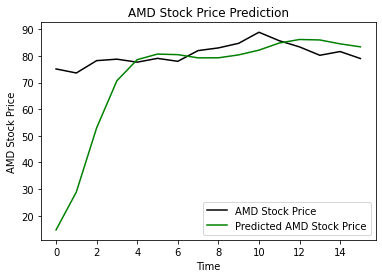

In [ ]:
#import the test set for the model to make predictions
url = '/content/amd_lstm_predict.csv'
dataset_test = pd.read_csv(url)
real_stock_price = dataset_test.iloc[:, 1:2].values

#before predicting future prices, we have to manipulate the training set
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#Plot predicted stock prices and actual stock price
plt.plot(real_stock_price, color = 'black', label = 'AMD Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted AMD Stock Price')
plt.title('AMD Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('AMD Stock Price')
plt.legend()
plt.show()

# Quant Connect Testing

In [ ]:
# In this algorithm, we are importing a list of 'buy' dates from a github csv.
# We will purchase call options on these dates and sell them with a simple
# trailing stop-limit.
# Resources - https://youtu.be/Lq-Ri7YU5fU

import io
import requests
import pandas as pd
from datetime import timedelta
from QuantConnect.Data.Custom.CBOE import * # get pricing data

class WellDressedBlackLemur(QCAlgorithm):

    def Initialize(self):
        # NOTE: QuantConnect provides equity options data from AlgoSeek going back as far as 2010.
        # The options data is available only in minute resolution, which means we need to consolidate
        # the data if we wish to work with other resolutions. 
        self.SetStartDate(2010, 1, 1)  # Set Start Date
        self.SetEndDate(2021, 4, 26) # Set End Date
        self.SetCash(1000000)  # Set Strategy Cash
        
        #Equity Info Here
        self.equity = self.AddEquity("AMD", Resolution.Minute)
        #Normalize data or calculations will be off
        self.equity.SetDataNormalizationMode(DataNormalizationMode.Raw)
        self.symbol = self.equity.Symbol
        
        # Options Contracts
        # initialize the option contract with empty string
        self.contract = str()
        # keep track of options contracts so we don't add the same contracts multiple times
        self.contractsAdded = set()
        self.buyOptions = 0 # buy signal
        
        # Buy/Sell Contract Criteria
        self.DaysBeforeExp = 5 # days before we close the options
        self.DTE = 60 # target contracts before expiration
        self.OTM = 0.10 # target OTM %
        self.percentage = 0.05 # percent of portfolio
        self.contractAmounts = 10 # number of contracts to purchase
        
        # Schedule plotting function 30 minutes after every market open
        self.Schedule.On(self.DateRules.EveryDay(self.symbol), \
                        self.TimeRules.AfterMarketOpen(self.symbol, 30), \
                        self.Plotting)
                        
        # Download NN Buy Signals from Github Raw CSV
        self.url = "https://raw.githubusercontent.com/SteenJennings/Neural-Net-Options/master/Kevin/QuantCSV/amd_predictions_05072021.csv"
        df = pd.read_csv(io.StringIO(self.Download(self.url)))
        df[['month','day','year']] = df['date'].str.split("/", expand = True)
        df = df.drop(columns=['date','Prediction'])
        buyArray = df.to_numpy()
        
        # Next step is to iterate through each date and schedule a buy signal for the algorithm
        for x in buyArray:
            # Schedule Buys - https://www.quantconnect.com/docs/algorithm-reference/scheduled-events
            self.Schedule.On(self.DateRules.On(int(x[2]), int(x[0]), int(x[1])), \
                            self.TimeRules.At(9,31), \
                            self.BuySignal)

    def OnData(self, data):
        '''OnData event is the primary entry point for your algorithm. Each new data point will be pumped in here.
            Arguments:
                data: Slice object keyed by symbol containing the stock data
        '''
        if self.Portfolio.Cash > 30000 and self.buyOptions == 1:
            self.BuyCall(data)
        
        # close contract before it expires
        if self.contract:
            if(self.contract.ID.Date - self.Time) <= timedelta(self.DaysBeforeExp):
                self.Liquidate(self.contract)
                self.Log("Closed: too close to expiration")
                self.contract = str()
    
    # Sets 'Buy' Indicator to 1 - this will initiate a contract buy later
    def BuySignal(self):
        self.Log("SpecificTime: Fired at : {0}".format(self.Time))
        self.buyOptions = 1
    
    # Buys a Call Option - 
    def BuyCall(self, data):
        if self.contract == str():
            # Retrieve options chain data
            self.contract = self.CallOptionsFilter(data)
            return
        #elif not self.Portfolio[self.contract].Invested and data.ContainsKey(self.contract):
        elif data.ContainsKey(self.contract):
            ### Change this to buy contracts with a percentage of settled cash
            self.Buy(self.contract, self.contractAmounts)
            # Reset buy signal
            self.buyOptions = 0
            
    def CallOptionsFilter(self, data):
        ''' The quantconnect api has multiple way to trade options.  The normal way is to set
            a filter and iterate over each option.  This can be slow so it is more efficient
            to get a list of the options contracts you're interested in and iterating through
            that.'''
        ''' OptionChainProvider gets a list of option contracts for an underlying symbol at requested date.
            Then you can manually filter the contract list returned by GetOptionContractList.
            The manual filtering will be limited to the information included in the Symbol
            (strike, expiration, type, style) and/or prices from a History call '''
        # note that the con of using the optionsChainProvider is you can't get Greeks or IV data
        
        contracts = self.OptionChainProvider.GetOptionContractList(self.symbol, data.Time)
        self.underlyingPrice = self.Securities[self.symbol].Price #save current stock price
        
        # filter the out-of-money options from the contract list which expire close to self.DTE number of days from now
        # Call options & less than 10% OTM & between 30/90 days   
        otm_calls = [i for i in contracts if i.ID.OptionRight == OptionRight.Call and
                                            i.ID.StrikePrice - self.underlyingPrice <= self.OTM * self.underlyingPrice and
                                            self.DTE - 30 < (i.ID.Date - data.Time).days < self.DTE + 30]
        
        # Sort options chain by DTE and OTM StrikePrice and add ONE to contract string
        if (len(otm_calls) > 0):
                contract = sorted(sorted(otm_calls, key = lambda x: abs((x.ID.Date - self.Time).days - self.DTE)),
                                                        key = lambda x: self.underlyingPrice - x.ID.StrikePrice)[0]
                if contract not in self.contractsAdded:
                    self.contractsAdded.add(contract)
                    self.AddOptionContract(contract, Resolution.Minute)
                    return contract
                elif contract in self.contractsAdded:
                    self.AddOptionContract(contract, Resolution.Minute)
                    return contract
                else:
                    return str()
            
    def Plotting(self):
        self.Plot("Data Chart", self.symbol, self.Securities[self.symbol].Close)
        
        option_invested = [x.Key for x in self.Portfolio if x.Value.Invested and x.Value.Type == SecurityType.Option]
        if option_invested:
            self.Plot("Data Chart", "strike", option_invested[0].ID.StrikePrice)
            
    def OnOrderEvent(self, orderEvent):
        # log order events
        self.Log(str(orderEvent))